**Avec réentrainement**

entrainement pour detecter si c une pomme, une cerise ou une orange

Apres entrainement le model detecte les orange et les cerise mais il confont les pommes avec les cerises.

C'est peut être du au manque dimage. Il y a aussi le video du gars sur youtube  qui fait le pretraitement keras.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#os.chdir("/content/gdrive/MyDrive/fruitsPommeCeriseOrange")  #sert a définir le chemin ou le dossier de travail dans google drive. 
#sys.path.append("/content/gdrive/MyDrive/fruitsPommeCeriseOrange") #sert a définir le chemin ou le dossier de travail dans google drive. 

#!cp -r <'PATH_TO_PNG_FOLDER'> /content/gdrive/My Drive/    #sa ne marche tentative regler probleme dajout dimage des video dans le Drive https://datascience.stackexchange.com/questions/64131/how-to-save-dynamic-files-from-colab-to-google-drive

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


import numpy as np
import os
import PIL

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

ya une erreur pour la recine qui va chercher le dossier test. Il manque le 2 

In [ ]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/fruitsPommeCeriseOrange2/train",
   # "fruitsPommeCeriseOrange/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/fruitsPommeCeriseOrange2/validation",
   # "fruitsPommeCeriseOrange/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/fruitsPommeCeriseOrange/test",
    #"fruitsPommeCeriseOrange/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 460 files belonging to 3 classes.
Found 67 files belonging to 3 classes.
Found 119 files belonging to 3 classes.


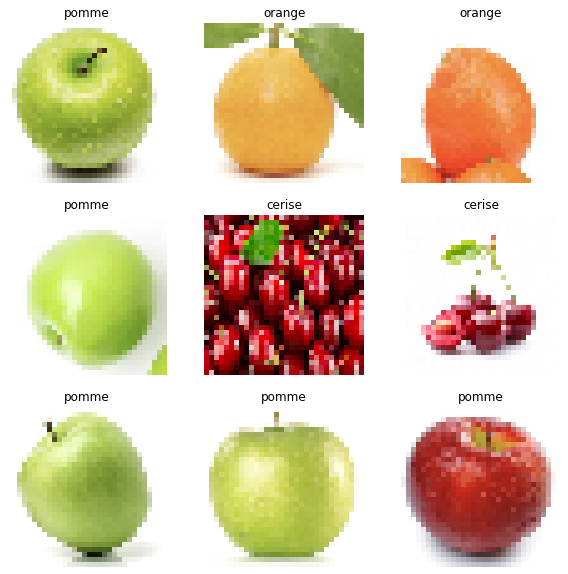

In [ ]:
class_names = ["pomme", "cerise", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
num_classes = len(class_names)

model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)


In [ ]:
model.compile(
    optimizer="adam",
    #loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
epochs=20  #etait a 10
hist = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=epochs
)

Epoch 1/20
23/23 [==============================] - 39s 2s/step - loss: 0.9035 - accuracy: 0.5587 - val_loss: 0.5674 - val_accuracy: 0.8209
Epoch 2/20
23/23 [==============================] - 7s 289ms/step - loss: 0.3476 - accuracy: 0.8826 - val_loss: 0.2407 - val_accuracy: 0.9104
Epoch 3/20
23/23 [==============================] - 7s 291ms/step - loss: 0.1954 - accuracy: 0.9239 - val_loss: 0.1202 - val_accuracy: 0.9851
Epoch 4/20
23/23 [==============================] - 7s 280ms/step - loss: 0.1583 - accuracy: 0.9413 - val_loss: 0.3225 - val_accuracy: 0.8806
Epoch 5/20
23/23 [==============================] - 8s 327ms/step - loss: 0.1430 - accuracy: 0.9457 - val_loss: 0.0801 - val_accuracy: 0.9851
Epoch 6/20
23/23 [==============================] - 8s 313ms/step - loss: 0.1225 - accuracy: 0.9522 - val_loss: 0.2553 - val_accuracy: 0.9104
Epoch 7/20
23/23 [==============================] - 7s 279ms/step - loss: 0.0872 - accuracy: 0.9696 - val_loss: 0.1224 - val_accuracy: 0.9403
Epoch 8/

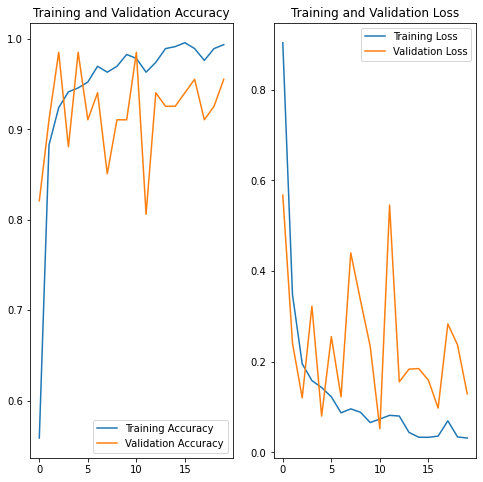

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Augmentation des données**

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

Visualisons à quoi ressemblent quelques exemples augmentés en appliquant plusieurs fois l'augmentation de données à la même image :

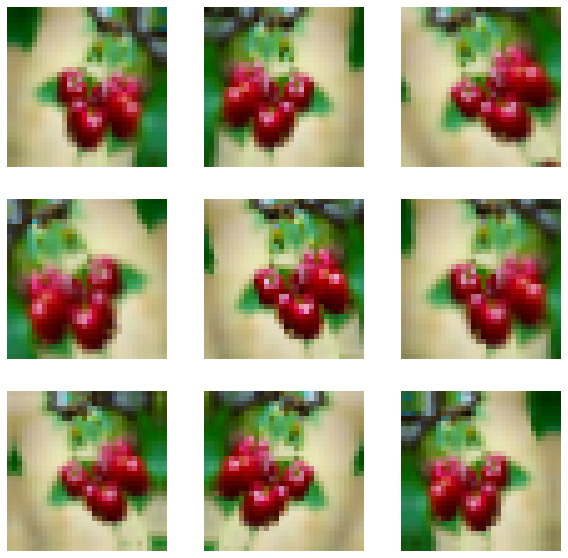

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

**Abandonner**

Une autre technique pour réduire le surajustement consiste à introduire une régularisation des abandons dans le réseau.

Lorsque vous appliquez une suppression à une couche, elle supprime de manière aléatoire (en définissant l'activation sur zéro) un certain nombre d'unités de sortie de la couche pendant le processus d'apprentissage. L'abandon prend un nombre fractionnaire comme valeur d'entrée, sous la forme de 0,1, 0,2, 0,4, etc. Cela signifie abandonner 10 %, 20 % ou 40 % des unités de sortie au hasard de la couche appliquée.

Créons un nouveau réseau de neurones avec tf.keras.layers.Dropout avant de l'entraîner à l'aide des images augmentées :


In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

**Compiler et entraîner le modèle**

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 rescaling_1 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                  

In [ ]:
epochs = 20  #etait a 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


23/23 [==============================] - 12s 339ms/step - loss: 0.9113 - accuracy: 0.5848 - val_loss: 0.4954 - val_accuracy: 0.8657
Epoch 2/20
23/23 [==============================] - 7s 289ms/step - loss: 0.4084 - accuracy: 0.8261 - val_loss: 0.3793 - val_accuracy: 0.8209
Epoch 3/20
23/23 [==============================] - 7s 286ms/step - loss: 0.2281 - accuracy: 0.9283 - val_loss: 0.2989 - val_accuracy: 0.8955
Epoch 4/20
23/23 [==============================] - 8s 332ms/step - loss: 0.1136 - accuracy: 0.9630 - val_loss: 0.3854 - val_accuracy: 0.8955
Epoch 5/20
23/23 [==============================] - 8s 327ms/step - loss: 0.0682 - accuracy: 0.9761 - val_loss: 0.1603 - val_accuracy: 0.9701
Epoch 6/20
23/23 [==============================] - 7s 286ms/step - loss: 0.1103 - accuracy: 0.9522 - val_loss: 0.1893 - val_accuracy: 0.9104
Epoch 7/20
23/23 [==============================] - 8s 322ms/step - loss: 0.1278 - accuracy: 0.9478 - val_loss: 0.3332 - val_accuracy: 0.8955
Epoch 8/20
23/23

**Visualisez les résultats de l'entraînement**

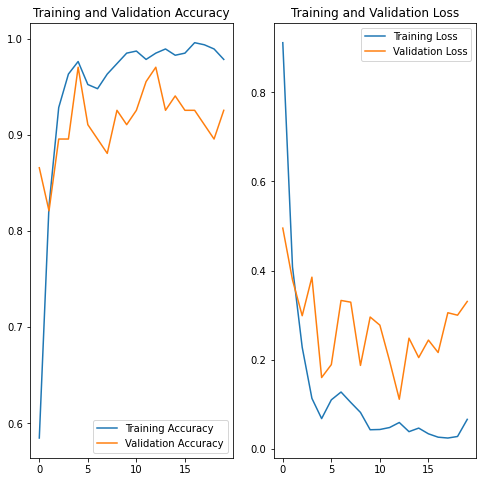

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.evaluate(test_ds)

6/6 [==============================] - 15s 7ms/step - loss: 0.1153 - accuracy: 0.9664


[0.11529862880706787, 0.9663865566253662]

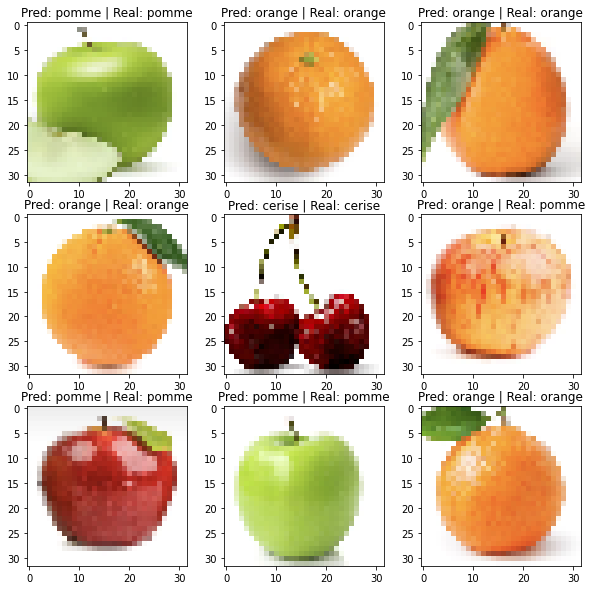

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("modelPommeCeriseAugmenter1.tflite", 'wb') as f:
  f.write(tflite_model)